In [1]:
from sklearn.datasets import make_classification

# Dummy data
clasData = make_classification(n_features = 5, n_samples = 50,random_state = 4)
X=clasData[0]
y=clasData[1]

print(X)
print(y)

[[-6.95396909e-01 -2.76067800e-03  9.23258362e-02  1.65236843e+00
   1.00669971e+00]
 [ 1.73239851e+00  4.44870074e-02  6.87601973e-02 -1.66459943e+00
  -1.36964404e+00]
 [ 7.64105665e-01 -1.70268403e-01 -6.50739220e-01  1.55566043e-01
   1.54389616e+00]
 [-1.49585236e+00  8.52212426e-03  1.35307760e-01  1.63982779e+00
   9.03065637e-01]
 [ 1.12837333e+00 -5.01737419e-02 -2.12631264e-01 -2.88934583e-01
   2.55753195e-01]
 [ 4.08058166e-01 -5.28650653e-03 -7.28888781e-02 -8.40080397e-01
  -4.54791315e-01]
 [ 3.86352130e-02  5.62105627e-02  3.79267160e-01  2.58577374e+00
   1.05942202e+00]
 [ 1.80833313e-01  1.47971115e-02  4.98991193e-02 -1.20216409e-01
  -1.97657013e-01]
 [-2.10156563e-01  3.74749350e-02  1.04029548e-01 -6.62794597e-01
  -7.13795194e-01]
 [ 1.55593792e+00  1.38986761e-01  6.52487837e-01  1.81835168e+00
  -1.02765917e-01]
 [ 2.12370287e-01  1.28724368e-01  5.87853291e-01  1.42017212e+00
  -2.52210357e-01]
 [-4.08650312e-01 -7.76976486e-02 -3.22357376e-01 -3.36500300e-01

In [3]:
import numpy as np

# Initialization
learning_rate = 0.1
n_iter = 600
b = 0
w = np.zeros(X.shape[1])  #an array of weights for each X variables
print(w)

[0. 0. 0. 0. 0.]


In [4]:
# Implement Logistic Regression functions with lambda
predict = lambda x, w, b: np.matmul(w,x.T) + b
sigmoid = lambda yhat: 1/(1+np.exp(-yhat))
loss = lambda y, sigmoid: -(y*np.log(sigmoid)+(1-y)*np.log(1-sigmoid)).mean()
dldw = lambda x, y, sigmoid: (np.reshape(sigmoid-y,(50,1))*x).mean(axis = 0)
dldb = lambda y, sig: (sig-y).mean(axis = 0)
update = lambda a, g, lr: a-(g*lr)

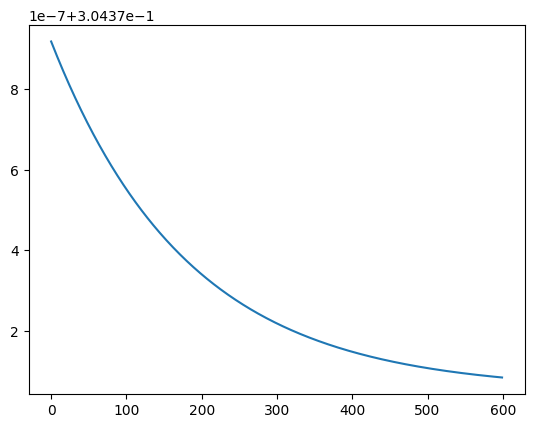

In [12]:
# Do Iteration 
losses = []
for i in range(n_iter):
    yhat = predict(X,w,b)
    sig = sigmoid(yhat)
    logloss = loss(y,sig)
    losses.append(logloss)
    grad_w = dldw(X,y,sig)
    grad_b = dldb(y,sig)
    w = update(w,grad_w,learning_rate)
    b = update(b,grad_b,learning_rate)

import matplotlib.pyplot as plt
plt.plot(losses)
plt.show()


In [11]:
from sklearn.metrics import classification_report

# Make Classification Report
yhat = predict(X,w,b)
sigy = sigmoid(yhat)
ypred = sigy >= 0.5
print(classification_report(y,ypred))


              precision    recall  f1-score   support

           0       0.88      0.84      0.86        25
           1       0.85      0.88      0.86        25

    accuracy                           0.86        50
   macro avg       0.86      0.86      0.86        50
weighted avg       0.86      0.86      0.86        50

